# Data Preprocessing
---

* KNU data

In [1]:
import tensorflow as tf
tf.__version__
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3202311010080448376,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11136846199729764064
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 48080040756
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2454488220016537314
 physical_device_desc: "device: 0, name: Quadro RTX 8000, pci bus id: 0000:61:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17437499573471066991
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
import glob
import os
import pprint
from tqdm import tqdm
from sklearn.utils import Bunch

from IPython import display
import ipywidgets as widgets

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')

import cv2 as cv

In [3]:
from jin import jin_utils

%load_ext version_information
%version_information matplotlib, numpy, pandas, seaborn, cv2, skimage

ModuleNotFoundError: No module named 'jin'

## Dental Model Images with Angle Class
---

* Images processed by Diorco labeling SW

### Paths
---

In [4]:
import os
import glob

In [5]:
data_path_root = '/sgcwhb/Malocclusion/data'

data_paths_deid = glob.glob(os.path.join(data_path_root, r'*_DeID'))
data_paths_deid = sorted(data_paths_deid)

print(data_paths_deid)
#jin_utils.print_paths(data_paths_deid)

data_paths_diorco = glob.glob(os.path.join(data_path_root, r'*_Diorco'))
data_paths_diorco = sorted(data_paths_diorco)

print(data_paths_diorco)
#jin_utils.print_paths(data_paths_diorco)

label_paths = glob.glob(os.path.join(data_path_root, '*_DeID/label*'))
label_paths = sorted(label_paths)

print(label_paths)
#jin_utils.print_paths(label_paths)

['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_DeID', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_DeID']
['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_Diorco']
['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_DeID/label.xlsx', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_DeID/label.xlsx']


In [6]:
data_paths_deid

['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_DeID',
 '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_DeID']

In [7]:
data_paths_diorco

['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco',
 '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_Diorco']

In [8]:
label_paths

['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_DeID/label.xlsx',
 '/sgcwhb/Malocclusion/data/data_KNU_2020-08-31_DeID/label.xlsx']

### Hyper-parameters
---

In [9]:
params = Bunch(resize_wh = (1920, 1039),
               crop_row_range = (332, 812),
               crop_col_size_half = 2**4 * 11)

for k, v in params.items():
    print(f'{k}: {v}')

resize_wh: (1920, 1039)
crop_row_range: (332, 812)
crop_col_size_half: 176


### Images
---

In [10]:
img_paths_list = []

for data_path_diorco in data_paths_diorco:
    img_paths = glob.glob(os.path.join(data_path_diorco, r'*_SO_reori.jpg'))
#     img_paths = sorted(img_paths)
    
    print(len(img_paths))
    img_paths_list.extend(img_paths)
else:
    img_paths = img_paths_list
    del img_paths_list
    img_paths = sorted(img_paths)
    
    print(img_paths)

200
620
['/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0026_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0026_02B1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0041_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0041_02B1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0044_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0044_02B1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0059_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0059_02B1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0067_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0067_02B1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0070_01A1SU_SO_reori.jpg', '/sgcwhb/Malocclusion/data/data_KNU_2020-08-14_Diorco/QH0070_02B1SU_SO_reori.j

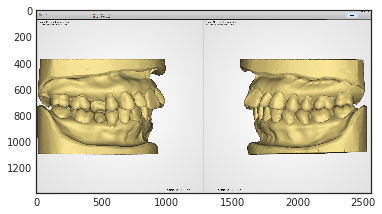

In [11]:
img = cv.imread(img_paths[0])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()

plt.imshow(img)

plt.show()

### Labels
---

(200, 4)
(620, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient_id     820 non-null    object
 1   tx_phase       820 non-null    object
 2   angle_class_r  820 non-null    int64 
 3   angle_class_l  820 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.8+ KB


None

,patient_id,tx_phase,angle_class_r,angle_class_l
0,QH0026,Pre-Tx,1,1
1,QH0026,Post-Tx,1,2
2,QH0041,Pre-Tx,2,1
3,QH0041,Post-Tx,2,1
4,QH0044,Pre-Tx,2,2
...,...,...,...,...
815,QH1245,Post-Tx,1,1
816,QH1248,Pre-Tx,1,3
817,QH1248,Post-Tx,2,1
818,QH1250,Pre-Tx,2,2


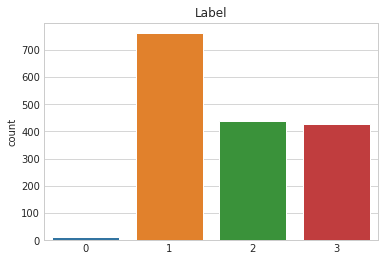

In [12]:
label_df_list = []

for label_path in label_paths:

#     label_df = pd.read_excel(label_path,
#                          usecols=['Project_id', 'Tx', 'Phase', 'Angle_Class_Type_Right', 'Angle_Class_Type_Left'])

    label_df = pd.read_excel(label_path,
                         usecols=['Project_id', 'Phase', 'Angle_Class_Type_Right', 'Angle_Class_Type_Left'])
    
    print(label_df.shape)
    
    # Fill empty cells.
    for row_idx, project_id in enumerate(label_df.Project_id):
        if row_idx % 2 == 0:
            project_id_temp = project_id
        else:
            label_df.iloc[row_idx, 0] = project_id_temp
            
    label_df_list.append(label_df)
else:
    label_df = pd.concat(label_df_list)
    del(label_df_list)
    
    # Rename Columns.

#     label_df.rename(columns={'Project_id': 'patient_id',
#                              'Tx': 'tx',
#                              'Phase': 'tx_phase',
#                              'Angle_Class_Type_Right': 'angle_class_r',
#                              'Angle_Class_Type_Left': 'angle_class_l'},
#                     inplace=True)


    label_df.rename(columns={'Project_id': 'patient_id',
                             'Phase': 'tx_phase',
                             'Angle_Class_Type_Right': 'angle_class_r',
                             'Angle_Class_Type_Left': 'angle_class_l'},
                    inplace=True)
    

    
    
    
    label_df.reset_index(drop=True, inplace=True)
    
    # Change some values.
    label_df.loc[label_df.tx_phase == 'Pre-treatment', 'tx_phase'] = 'Pre-Tx'
    label_df.loc[label_df.tx_phase == 'Post-treatment', 'tx_phase'] = 'Post-Tx'
    
    display.display(label_df.info())
    display.display(label_df)
    
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    
    plt.title('Label')
    sns.countplot(np.concatenate([label_df.angle_class_r, label_df.angle_class_l]))

    plt.show()

### Preprocessing
---

100%|██████████| 820/820 [00:49<00:00, 16.49it/s]


uint8 (809, 480, 784, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   patient_id     809 non-null    object
 1   tx_phase       809 non-null    object
 2   angle_class_r  809 non-null    int64 
 3   angle_class_l  809 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 25.4+ KB


None

,patient_id,tx_phase,angle_class_r,angle_class_l
0,QH0026,Pre-Tx,1,1
1,QH0026,Post-Tx,1,2
2,QH0041,Pre-Tx,2,1
3,QH0041,Post-Tx,2,1
4,QH0044,Pre-Tx,2,2
...,...,...,...,...
804,QH1245,Post-Tx,1,1
805,QH1248,Pre-Tx,1,3
806,QH1248,Post-Tx,2,1
807,QH1250,Pre-Tx,2,2


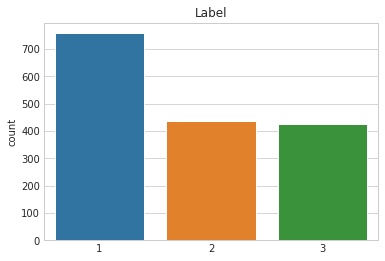

In [13]:
imgs = []
label_df_list = []

for img_path in tqdm(img_paths):
    data_info = os.path.basename(img_path)[:11]
    patient_id = data_info.split('_')[0]

    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    if img.size > (params.resize_wh[0] * params.resize_wh[1]):
        img = cv.resize(img, params.resize_wh, interpolation=cv.INTER_AREA)
    else:
        print(f'{img_path}: Image size should be larger than ({params.resize_wh[1]}, {params.resize_wh[0]}).')
        raise
    
    col_idx_half = img.shape[1] // 2

    img = img[params.crop_row_range[0]:params.crop_row_range[1]]
    img_r = img[:, : col_idx_half - params.crop_col_size_half]
    img_l = img[:, col_idx_half + params.crop_col_size_half :]
    img_l = np.fliplr(img_l)
    img = np.concatenate((img_r, img_l), axis=2)

    if data_info[-2] == 'A':
        bool_mask = (label_df.patient_id == patient_id) & (label_df.tx_phase == 'Pre-Tx')
    elif data_info[-2] == 'B':
        bool_mask = (label_df.patient_id == patient_id) & (label_df.tx_phase == 'Post-Tx')
    label = [int(label_df[bool_mask].angle_class_r),
             int(label_df[bool_mask].angle_class_l)]
    
    # DEBUG:
#    print(f'{data_info}: {img.shape}, {label}')
    
    if 0 in label:
        continue
    
    imgs.append(img)
    label_df_list.append(label_df[bool_mask])
    
    
else:
    imgs = np.asarray(imgs)
    label_df = pd.concat(label_df_list)
    del label_df_list
    label_df.reset_index(drop=True, inplace=True)
    
    print(imgs.dtype, imgs.shape)
    print()
    display.display(label_df.info())
    display.display(label_df)
    print()

    
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    
    plt.title('Label')
    sns.countplot(np.concatenate([label_df.angle_class_r, label_df.angle_class_l]))

    plt.show()
    plt.style.use('seaborn-white')
    

In [14]:
np.save('/sgcwhb/Malocclusion/data/origin_input_data/data_KNU_Diorco_so_imgs.npy', imgs)
label_df.to_csv('/sgcwhb/Malocclusion/data/origin_input_data/data_KNU_Diorco_so_img_labels.csv', index=False)

In [15]:
len(label_df)

809